In [1]:
import pandas as pd

# Load the uploaded file

df = pd.read_csv('DATA/weather_prediction_dataset2.csv')

# Display the first few rows to understand its structure
df.head()

# Reload the dataset with the correct delimiter
df = pd.read_csv('DATA/weather_prediction_dataset2.csv', delimiter=';')

# Display the first few rows to understand its structure with the correct delimiter
df.head()

# Convert the DataFrame from wide to long format
df_long = pd.wide_to_long(df, 
                          stubnames='temp_mean', 
                          i=['DATE', 'MONTH'], 
                          j='Ville', 
                          sep='_', 
                          suffix='.+').reset_index()

# Display the transformed DataFrame

print("Long Format Weather Data")
display(df_long.head())  # Affiche les 5 premières lignes du DataFrame

# Inspect the column names to understand the structure better
df.columns

# Since each city has a unique prefix before "_temp_mean", we need to adjust our conversion strategy
# We'll directly perform the wide-to-long transformation manually without relying on suffix-based splitting

df_long_corrected = pd.melt(df, 
                            id_vars=['DATE', 'MONTH'], 
                            var_name='Ville', 
                            value_name='Temperature')

# Display the corrected long-format DataFrame
print("Corrected Long Format Weather Data")
print(df_long_corrected.head())  # Affiche les premières lignes du DataFrame

df_long_corrected.Ville = df_long_corrected.Ville.str.replace("_temp_mean","")
df_long_corrected.Ville

df_long_corrected.DATE= pd.to_datetime(df_long_corrected.DATE, format='%Y%m%d')
#df_long_corrected

data = df_long_corrected.dropna(axis=0)

print(data.head())

data['year'] = pd.to_datetime(data['DATE']).dt.year
data['month'] = pd.to_datetime(data['DATE']).dt.month
data['day'] = pd.to_datetime(data['DATE']).dt.day



Long Format Weather Data


,DATE,MONTH,Ville,BASEL_temp_mean,BUDAPEST_temp_mean,DE_BILT_temp_mean,DRESDEN_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,...,MALMO_temp_mean,MONTELIMAR_temp_mean,MUENCHEN_temp_mean,OSLO_temp_mean,PERPIGNAN_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,temp_mean


Corrected Long Format Weather Data
       DATE  MONTH            Ville  Temperature
0  20000101      1  BASEL_temp_mean          2.9
1  20000102      1  BASEL_temp_mean          3.6
2  20000103      1  BASEL_temp_mean          2.2
3  20000104      1  BASEL_temp_mean          3.9
4  20000105      1  BASEL_temp_mean          6.0
        DATE  MONTH  Ville  Temperature
0 2000-01-01      1  BASEL          2.9
1 2000-01-02      1  BASEL          3.6
2 2000-01-03      1  BASEL          2.2
3 2000-01-04      1  BASEL          3.9
4 2000-01-05      1  BASEL          6.0


In [2]:
import matplotlib.pyplot as plt

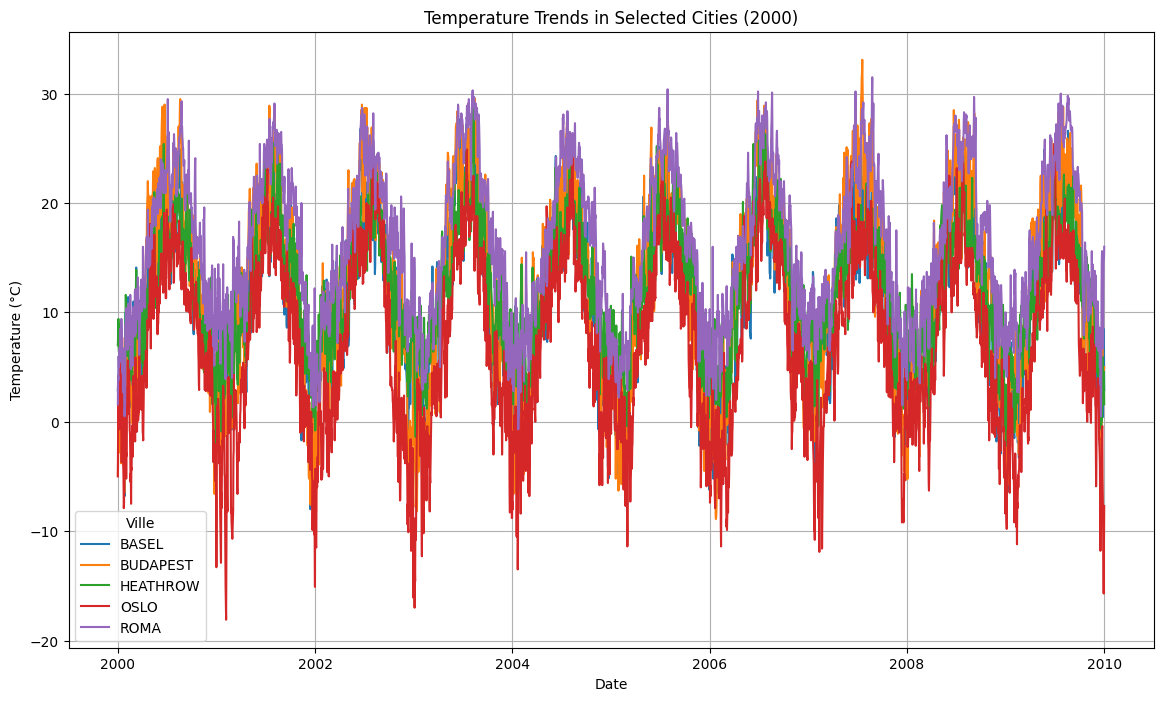

In [3]:
# Select a few cities to visualize their temperature trends over time
selected_cities = ['BASEL', 'BUDAPEST', 'HEATHROW', 'OSLO', 'ROMA']

# Filter the data for the selected cities
df_selected_cities = data[data['Ville'].isin(selected_cities)]

# Plot the temperature trends for the selected cities
plt.figure(figsize=(14, 8))
for city in selected_cities:
    city_data = df_selected_cities[df_selected_cities['Ville'] == city]
    plt.plot(city_data['DATE'], city_data['Temperature'], label=city)

# Adding title and labels
plt.title('Temperature Trends in Selected Cities (2000)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend(title='Ville')
plt.grid(True)

# Display the plot
plt.show()


<Figure size 1200x800 with 0 Axes>

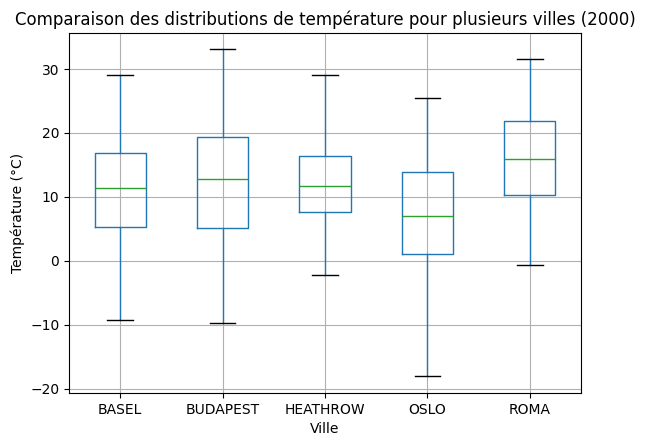

In [4]:
# Sélectionner quelques villes pour comparer leurs distributions de température
villes_selectionnees = ['BASEL', 'BUDAPEST', 'HEATHROW', 'OSLO', 'ROMA']

# Filtrer les données pour les villes sélectionnées
df_villes_selectionnees = data[data['Ville'].isin(villes_selectionnees)]

# Créer un graphique en boîte à moustaches (boxplot) comparant les distributions de température
plt.figure(figsize=(12, 8))
df_villes_selectionnees.boxplot(column='Temperature', by='Ville', grid=True)

# Ajouter un titre et des étiquettes
plt.title('Comparaison des distributions de température pour plusieurs villes (2000)')
plt.suptitle('')  # Supprimer le sous-titre par défaut
plt.xlabel('Ville')
plt.ylabel('Température (°C)')

# Afficher le graphique
plt.show()


In [5]:
%pip install ace_tools


Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [10]:
data['Ville_code'] = pd.factorize(data['Ville'])[0] + 1
print(data)

            DATE  MONTH  Ville  Temperature  year  month  day  Ville_code
0     2000-01-01      1  BASEL          2.9  2000      1    1           1
1     2000-01-02      1  BASEL          3.6  2000      1    2           1
2     2000-01-03      1  BASEL          2.2  2000      1    3           1
3     2000-01-04      1  BASEL          3.9  2000      1    4           1
4     2000-01-05      1  BASEL          6.0  2000      1    5           1
...          ...    ...    ...          ...   ...    ...  ...         ...
65767 2009-12-28     12  TOURS          6.2  2009     12   28          18
65768 2009-12-29     12  TOURS         10.4  2009     12   29          18
65769 2009-12-30     12  TOURS         10.0  2009     12   30          18
65770 2009-12-31     12  TOURS          8.5  2009     12   31          18
65771 2010-01-01      1  TOURS          0.5  2010      1    1          18

[65772 rows x 8 columns]


In [8]:
#data['ville_code'] = data['Ville'].astype('category').cat.codes

In [9]:
#villes = data['Ville']
#ville_code = data[data['Ville'] == villes].iloc[0]['Ville']
#print(ville_code)



X = data[['year', 'month','day','ville_code']]
#X = data[['year', 'month','day']]
y = data['Temperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "['ville_code'] not in index"

In [111]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [112]:
y_pred = model.predict(X_test)
y_pred

array([13.18 , 10.944,  3.481, ..., 19.188, 20.642, 16.033])

In [113]:
X_test[1:2]

,year,month,day,ville_code
21127,2007,10,28,5


In [114]:
model.predict(pd.DataFrame({"year":[2025],"month":[7],"day":[27],"ville_code":[6]}))
#model.predict(pd.DataFrame({"year":[2025],"month":[12],"day":[3]}))


array([18.173])

In [60]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [61]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 1.5604285062713799
MSE: 4.214083009274041
R²: 0.9412824087951331


In [62]:
import joblib
joblib.dump(model, 'C:\\Users\\theog\\ProjetIA.venv\\.venv\\modele_prediction.pkl')

['C:\\Users\\theog\\ProjetIA.venv\\.venv\\modele_prediction.pkl']